In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix

In [78]:
df = pd.read_csv('titanic.csv')

In [79]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [9]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

### We have 12 columns(features), Lets check wchich one we need and which we drop

### Our target is to predict % of Passenger survived

#### For survival rate we dont need PassengerId which is like index number for each thats why we dont need it

<AxesSubplot:xlabel='Pclass'>

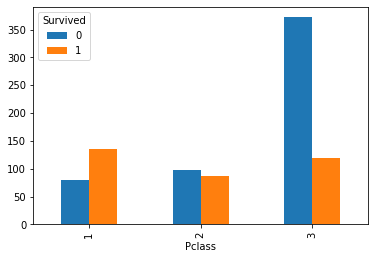

In [10]:
pd.crosstab(df.Pclass,df.Survived).plot(kind = 'bar')

#### here we have 3 class types of passenger which is required for our model , fom bar chart also we get the difference of passenger according to class

#### name is not required for our model as each passenger has its own and it will not affect on is it survived or not

In [13]:
df.Sex.unique() 

array(['male', 'female'], dtype=object)

#### sex: two sex class male or female, so it is require to know survived one is male or female

<AxesSubplot:xlabel='Sex'>

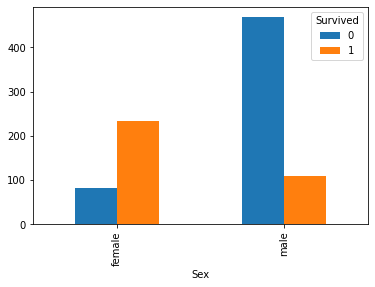

In [14]:
pd.crosstab(df.Sex,df.Survived).plot(kind = 'bar')

#### so from bar chart most male passenger are not survived

In [17]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### age is important feature to be in model, as survival depend on age mostly , but here in age we have 177 null calues

In [23]:
df.Age.mean()

29.69911764705882

In [25]:
df.Age.median()

28.0

#### Here we will use median value to replace NAN values from Age 

In [80]:
df.fillna(df.Age.median(),inplace=True)

In [81]:
df.Age.isna().sum()

0

#### we succefully replaced NAN value with median

In [33]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.0,S


#### survival rate is also not depend on SibSp,Parch,Ticket,Cabin and Embarked as these feture not relate to survival

In [82]:
df.Fare.nunique()

248

#### her we have 248 types of fares , is is possible deped on survival as we can guess high fare passengers have better possibility to survive

#### let we drop features as suggested above

In [83]:
df = df.drop(['PassengerId','Name','SibSp', 'Parch','Cabin', 'Embarked','Ticket'],axis=1)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#### Here we have one sex feature is categorical we have to make it numerical values

In [85]:
df.Sex = df.Sex.map({'male':1,'female':2})

In [86]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


#### We will use decision tree to predict survival rate

In [87]:
X = df.drop(['Survived'],axis=1)

In [88]:
y = df.Survived

#### split our model into train and test data

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=6)

In [99]:
X_train.shape

(623, 4)

In [100]:
X.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

#### train data

In [116]:
model = DecisionTreeClassifier()

In [117]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
model.score(X_train,y_train)*100

98.31460674157303

In [119]:
model.score(X_test,y_test)*100

83.24022346368714

#### trainig accuracy is 98% but test accuracy is 83% which is quite good

In [122]:
y_pred = model.predict(X_test)

In [124]:
mean_absolute_error(y_test,y_pred)*100

16.75977653631285

In [127]:
mean_squared_error(y_test,y_pred)*100

16.75977653631285

In [129]:
r2_score(y_test,y_pred)*100

27.996781979082897

In [131]:
accuracy_score(y_test,y_pred)*100

83.24022346368714

In [132]:
confusion_matrix(y_test,y_pred)

array([[99, 14],
       [16, 50]], dtype=int64)